<h1>Chapter 2: Analysis</h1>

<span>
    My first jupyter notebook, demonstrating some code from class and the chapter.
</span>

In [1]:
print('Hello world!')

Hello world!


In [18]:
from matplotlib import pyplot
import math

<span>First I created an execution time function that can be easily imported and is what I call "function agnostic." Meaning, I can import my function and pass functions to the function and get the result (whatever the function returns, and the time it took to execute:</span>

In [3]:
from executiontime import execution_time

<span>After importing, calling my function looks like this:</span>

In [4]:
result, exec_time = execution_time(sum([1, 2, 3]), 1000000)

In [5]:
print('Here\'s the result of the sum of 1, 2, and 3, executed 1000000 times, and the execution time:', execution_time(sum([1, 2, 3]), 1000000))

Here's the result of the sum of 1, 2, and 3, executed 1000000 times, and the execution time: (6, 5.3781986236572266e-08)


<span>Here's the code...

Note: Please see docstring for execution_time() function source:

</span>

<code>
""" execution-time.py | Mon, Jan 30, 2017 | Roman S. Collins
Demonstrating how to calculate execution time using a function
in Python...
Jim's example:
def run_time(f, n, loopcount=1000):
    # Return the run time in seconds of f(n)
    # see https://docs.python.org/2/library/time.html
    from time import time
    start = time()
    for loop in range(loopcount):
        anwer = f(n)
    end = time()
    return (end - start)/loopcount
Assumes a specific function is called within the loop.
Whereas attempt to make my loop "function agnostic",
ultimately not that different though
"""

from doctest import testmod
from time import time

def execution_time(some_function, iter_count):
    start_time = time()

    for iterations in range(iter_count):
        result = some_function

    end_time = time()

    exec_time = (end_time - start_time) / iter_count

    return result, exec_time

def main():
    """ Hard to doctest ever changing variables so maybe this is the best
        we can do?
        Doctest:
        >>> sus = [1, 3, 34, 53, 645, 234, 6234, 111, 1123, 100, 12, 12, 23]
        >>> result, exec_time = execution_time(sum(sus), 2000000)
        >>> isinstance(result, int)
        True
        >>> isinstance(exec_time, float)
        True
    """

    sus = [1, 3, 34, 53, 645, 234, 6234, 111, 1123, 100, 12, 12, 23]

    result, exec_time = execution_time(sum(sus), 2000000)

    print('TEST: print \"result\", \"exec_time\":', result, exec_time)

if __name__=='__main__':
    testmod()
main()
</code>

<span>Let's grab some code from the last assingment to test our new function... 

$ cp -r ../chapter-1/waysoffib.py .

</span>

In [6]:
from waysoffib import *

In [7]:
dir()

['In',
 'Memoize',
 'Out',
 'WAYSOFFIB',
 '_',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_dh',
 '_i',
 '_i1',
 '_i2',
 '_i3',
 '_i4',
 '_i5',
 '_i6',
 '_i7',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 '_sh',
 'a',
 'b',
 'exec_time',
 'execution_time',
 'exit',
 'get_ipython',
 'main',
 'pyplot',
 'quit',
 'result',
 'sys']

<span>After importing waysoffib.py, I name some variables.</span>

In [8]:
wof = WAYSOFFIB()

In [9]:
n = 10

<span>Now I can use the functions. As we will see the sum of a fibonacci sequence of 10 is equal to 55 as, the sequence is this:
<br>1, 1, 2, 3, 5, 8, 13, 21, 34, 55</br>
<br></br>
<br>
The result from one of our functions goes like this:
</br></span>

In [10]:
print(wof.gen(n))

55


<span>We can now test the execution time of our functions:</span>

In [11]:
functions = [wof.catalogued(n), wof.not_catalogued(n), wof.looping(n)]

for i in range(len(functions)):
    print(execution_time(functions[i], 1))

(55, 9.5367431640625e-07)
(55, 2.1457672119140625e-06)
(55, 1.430511474609375e-06)


In [12]:
for x in range(4):
    print('Results and execution times for iteration #' + str(x + 1) + ': ')
    for i in range(len(functions)):
        result, exponent = execution_time(functions[i], 2000000)
        print(result, exponent)

Results and execution times for iteration #1: 
55 4.002499580383301e-08
55 2.560114860534668e-08
55 4.633188247680664e-08
Results and execution times for iteration #2: 
55 2.7415990829467772e-08
55 2.7586698532104493e-08
55 2.6612281799316406e-08
Results and execution times for iteration #3: 
55 2.8960585594177245e-08
55 2.775239944458008e-08
55 2.8133511543273924e-08
Results and execution times for iteration #4: 
55 2.7982711791992188e-08
55 2.6376962661743163e-08
55 2.7578473091125488e-08


<span>As we can see, our execution time functions actually return exponents, example:
<br>2.48490571975708e-08</br>
<br></br>
<br>Decimal representation for the exponent is roughly:</br>
<br>2.48490571975708 × 10 ^ −8</br>
</span>

In [13]:
print('{:.10f}'.format(float(exponent)))

0.0000000276


<span>Emphasis on "roughly"...<br></br><br>But as we can also see from the returned result above, returned execution times vary wildly...</br>

This is because the chapter explains: "Notice that when n is small, the functions are not very well defined with respect to one another. It is hard to tell which is dominant. However, as n grows, there is a definite relationship and it is easy to see how they compare with one another." Not only do the timings change for each function each time it is run, the problem of differentiating between them is exascerbated by the fact that with such small numbers timings between the different functions are relatively close.

Because fib(n) is equal to 10, execution times between these various fibonacci functions won't vary much.

Before we solve for Big-O... or order of magnitude:

In [16]:
n = 35
functions = [wof.catalogued(n), wof.not_catalogued(n), wof.looping(n)]

for i in range(len(functions)):
    result, exponent = execution_time(functions[i], 1)
    print(result, exponent)

9227465 1.1920928955078125e-06
9227465 2.384185791015625e-06
9227465 1.9073486328125e-06


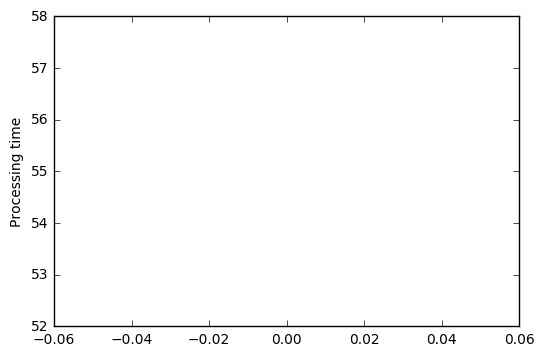

In [30]:
n = 10

pyplot.plot(wof.catalogued(n))
pyplot.plot(wof.not_catalogued(n))
pyplot.plot(wof.looping(n))

pyplot.xlabel('')
pyplot.ylabel('Processing time')
pyplot.title('')
pyplot.grid(False)
pyplot.show()

<h2>Plotting Big O</h2>
<span><br>Big O essentially means "order of magnitude," so the question is based on O() which function is most efficient?</br></span>

[1, 4, 9, 16, 25, 36, 49, 64, 81, 100, 121, 144, 169, 196, 225, 256, 289, 324, 361, 400, 441, 484, 529, 576, 625, 676, 729, 784, 841, 900, 961, 1024, 1089, 1156, 1225, 1296, 1369, 1444, 1521, 1600, 1681, 1764, 1849, 1936, 2025, 2116, 2209, 2304, 2401, 2500, 2601, 2704, 2809, 2916, 3025, 3136, 3249, 3364, 3481, 3600, 3721, 3844, 3969, 4096, 4225, 4356, 4489, 4624, 4761, 4900, 5041, 5184, 5329, 5476, 5625, 5776, 5929, 6084, 6241, 6400, 6561, 6724, 6889, 7056, 7225, 7396, 7569, 7744, 7921, 8100, 8281, 8464, 8649, 8836, 9025, 9216, 9409, 9604, 9801]
[10.0, 20.138629436111987, 30.329583686600433, 40.554517744447956, 50.80471895621705, 61.07505568153683, 71.36213710433871, 81.66355323334386, 91.9775021196026, 102.30258509299405, 112.6376848000782, 122.98188797974561, 133.33443416469999, 143.69468026146137, 154.06207530165332, 164.43614195558365, 174.81646268489555, 185.2026691642131, 195.59443406041623, 205.991464547108, 216.39349711921918, 226.8002933973883, 237.21163669663704, 247.62732919

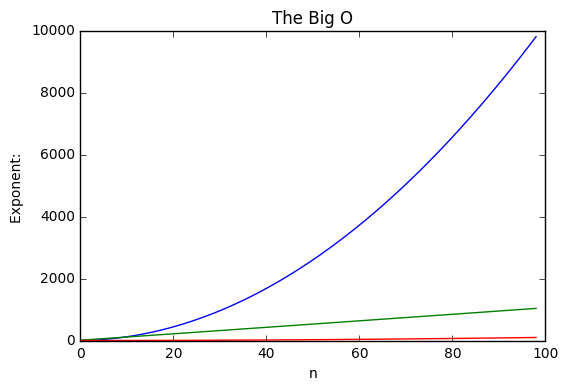

In [28]:
from matplotlib import pyplot
import math

vals = range(1, 100)

# Exponential
exp = [x ** 2 for x in vals]
print(exp)

# Logorithmic
fn = [10 * x + 0.1 * x * math.log(x) for x in vals]
print(fn)

gn = [0.01 * x ** 2 for x in vals]
print(gn)

pyplot.plot(exp)
pyplot.plot(fn)
pyplot.plot(gn)

pyplot.xlabel('n')
pyplot.ylabel('Exponent: ')
pyplot.title('The Big O')
pyplot.grid(False)
#pyplot.savefig("graph.png")
pyplot.show()

<h2>Finding substrings: </h2>